In [3]:
%load_ext autoreload
%autoreload 2
%matplotlib inline  
from IPython.display import HTML

In [4]:
from sklearn.metrics import f1_score, roc_auc_score, average_precision_score, precision_score, recall_score
import pandas
import numpy as np
import papermill as pm
import json
import matplotlib.pyplot as plt
import os
import uuid
from db import Result
import ast
import math
from vis.visualization import visualize_cam, visualize_saliency, overlay
from vis.utils.utils import load_img, normalize, find_layer_idx


pandas.options.display.float_format = '{:,.3f}'.format

In [1]:
from evaluate import load, get_results, get_labels, transform_binary_probabilities, transform_binary_predictions, calculate_accuracy_loss, plot_confusion_matrix, plot_precision_recall, plot_roc_curve, calculate_pr_auc, calculate_confusion_matrix_stats, calculate_confusion_matrix, plot_tsne, plot_multiple_grad_cam, plot_precision_recall

Using TensorFlow backend.
/home/sopeeweje/.local/share/virtualenvs/bone_master-xLR2Nuxv/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/sopeeweje/.local/share/virtualenvs/bone_master-xLR2Nuxv/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/sopeeweje/.local/share/virtualenvs/bone_master-xLR2Nuxv/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(

In [2]:
from data_gen import data
from run import characterize_data
from config import config

In [5]:
UUID = "e2c3eab7-92e3-41f6-8638-cc45d164f98f"

#t1: 4e4c0355-9643-4e22-80ba-78dd371c8900
#t1_t: 7b6d44a6-5439-47d5-a2b9-bf62193c0c2e
#t1_post: 2bcb25f3-b326-4f5b-ae3f-41eb90ae36ef
#t1_post_t: e50a3e1e-d292-4eb8-b152-a9a97238b5cb
#t2: 8c10b503-add4-48a0-92e1-49b156b9fb28
#t2_t: 5b548ac7-508c-41b9-8626-c8b8367e71c9

SELECTIONS = "None"
TSNE_PERPLEXITY = 5

In [6]:
SELECTIONS = eval(SELECTIONS)

In [7]:
result = Result.query.filter(Result.uuid == UUID).first()

In [8]:
print("input form:", result.input_form)

input form: t1


In [9]:
MODEL = "{}/models/{}-{}.h5".format(config.OUTPUT, UUID, result.model)

In [10]:
train, validation, test = data(seed=uuid.UUID(result.split_seed), label_form=result.label_form, input_form=result.input_form, train_shuffle=False, test_shuffle=False, validation_shuffle=False, train_augment=False, validation_augment=False, test_augment=False)

  0%|          | 0/194 [00:00<?, ?it/s]/Users/feyisope/.local/share/virtualenvs/bone_master-gLgG60Le/lib/python3.6/site-packages/scipy/misc/pilutil.py:482: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if issubdtype(ts, int):
/Users/feyisope/.local/share/virtualenvs/bone_master-gLgG60Le/lib/python3.6/site-packages/scipy/misc/pilutil.py:485: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif issubdtype(type(size), float):
  7%|▋         | 14/194 [00:01<00:22,  8.10it/s]


################################################################################
Exception occurred for: sort          -
volume    0.615
outcome   0.000
Name: chop-11, dtype: object
[Errno 2] No such file or directory: '/Volumes/external/bone_master/data_dir/preprocessed/chop-11-t1-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/Volumes/external/bone_master/data_gen.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/Volumes/external/bone_master/data_gen.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/Users/feyisope/.local/share/virtualenvs/bone_master-gLgG60Le/lib/python3.6/site-packages/nrrd/reader.py", line 506, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: '/Volumes/external/bone_master/data_dir/preprocessed/chop-11-t1-imagingVolume.nrrd'



 10%|█         | 20/194 [00:02<00:15, 11.58it/s]


################################################################################
Exception occurred for: sort          -
volume    0.615
outcome   0.000
Name: chop-37, dtype: object
[Errno 2] No such file or directory: '/Volumes/external/bone_master/data_dir/preprocessed/chop-37-t1-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/Volumes/external/bone_master/data_gen.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/Volumes/external/bone_master/data_gen.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/Users/feyisope/.local/share/virtualenvs/bone_master-gLgG60Le/lib/python3.6/site-packages/nrrd/reader.py", line 506, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: '/Volumes/external/bone_master/data_dir/preprocessed/chop-37-t1-imagingVolume.nrrd'



 13%|█▎        | 26/194 [00:03<00:24,  6.97it/s]


################################################################################
Exception occurred for: sort          -
volume    0.615
outcome   0.000
Name: chop-42, dtype: object
[Errno 2] No such file or directory: '/Volumes/external/bone_master/data_dir/preprocessed/chop-42-t1-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/Volumes/external/bone_master/data_gen.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/Volumes/external/bone_master/data_gen.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/Users/feyisope/.local/share/virtualenvs/bone_master-gLgG60Le/lib/python3.6/site-packages/nrrd/reader.py", line 506, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: '/Volumes/external/bone_master/data_dir/preprocessed/chop-42-t1-imagingVolume.nrrd'



 24%|██▎       | 46/194 [00:06<00:18,  7.97it/s]


################################################################################
Exception occurred for: sort          -
volume    0.615
outcome   0.000
Name: chop-63, dtype: object
[Errno 2] No such file or directory: '/Volumes/external/bone_master/data_dir/preprocessed/chop-63-t1-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/Volumes/external/bone_master/data_gen.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/Volumes/external/bone_master/data_gen.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/Users/feyisope/.local/share/virtualenvs/bone_master-gLgG60Le/lib/python3.6/site-packages/nrrd/reader.py", line 506, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: '/Volumes/external/bone_master/data_dir/preprocessed/chop-63-t1-imagingVolume.nrrd'



 39%|███▊      | 75/194 [00:10<00:19,  5.99it/s]


################################################################################
Exception occurred for: sort          -
volume    0.615
outcome   0.000
Name: china023, dtype: object
[Errno 2] No such file or directory: '/Volumes/external/bone_master/data_dir/preprocessed/china023-t1-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/Volumes/external/bone_master/data_gen.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/Volumes/external/bone_master/data_gen.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/Users/feyisope/.local/share/virtualenvs/bone_master-gLgG60Le/lib/python3.6/site-packages/nrrd/reader.py", line 506, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: '/Volumes/external/bone_master/data_dir/preprocessed/china023-t1-imagingVolume.nrrd'



 41%|████      | 80/194 [00:11<00:14,  8.02it/s]


################################################################################
Exception occurred for: sort          -
volume    0.615
outcome   0.000
Name: chop-32, dtype: object
[Errno 2] No such file or directory: '/Volumes/external/bone_master/data_dir/preprocessed/chop-32-t1-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/Volumes/external/bone_master/data_gen.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/Volumes/external/bone_master/data_gen.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/Users/feyisope/.local/share/virtualenvs/bone_master-gLgG60Le/lib/python3.6/site-packages/nrrd/reader.py", line 506, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: '/Volumes/external/bone_master/data_dir/preprocessed/chop-32-t1-imagingVolume.nrrd'



 44%|████▍     | 86/194 [00:11<00:09, 11.47it/s]


################################################################################
Exception occurred for: sort          -
volume    0.615
outcome   0.000
Name: chop-4, dtype: object
[Errno 2] No such file or directory: '/Volumes/external/bone_master/data_dir/preprocessed/chop-4-t1-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/Volumes/external/bone_master/data_gen.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/Volumes/external/bone_master/data_gen.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/Users/feyisope/.local/share/virtualenvs/bone_master-gLgG60Le/lib/python3.6/site-packages/nrrd/reader.py", line 506, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: '/Volumes/external/bone_master/data_dir/preprocessed/chop-4-t1-imagingVolume.nrrd'


###############################################################################

 50%|█████     | 97/194 [00:13<00:11,  8.77it/s]


################################################################################
Exception occurred for: sort          -
volume    0.615
outcome   0.000
Name: chop-73, dtype: object
[Errno 2] No such file or directory: '/Volumes/external/bone_master/data_dir/preprocessed/chop-73-t1-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/Volumes/external/bone_master/data_gen.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/Volumes/external/bone_master/data_gen.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/Users/feyisope/.local/share/virtualenvs/bone_master-gLgG60Le/lib/python3.6/site-packages/nrrd/reader.py", line 506, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: '/Volumes/external/bone_master/data_dir/preprocessed/chop-73-t1-imagingVolume.nrrd'



 62%|██████▏   | 120/194 [00:16<00:16,  4.39it/s]


################################################################################
Exception occurred for: sort          -
volume    0.616
outcome   1.000
Name: china097, dtype: object
[Errno 2] No such file or directory: '/Volumes/external/bone_master/data_dir/preprocessed/china097-t1-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/Volumes/external/bone_master/data_gen.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/Volumes/external/bone_master/data_gen.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/Users/feyisope/.local/share/virtualenvs/bone_master-gLgG60Le/lib/python3.6/site-packages/nrrd/reader.py", line 506, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: '/Volumes/external/bone_master/data_dir/preprocessed/china097-t1-imagingVolume.nrrd'



 67%|██████▋   | 130/194 [00:17<00:08,  7.87it/s]


################################################################################
Exception occurred for: sort          -
volume    0.617
outcome   1.000
Name: chop-105, dtype: object
[Errno 2] No such file or directory: '/Volumes/external/bone_master/data_dir/preprocessed/chop-105-t1-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/Volumes/external/bone_master/data_gen.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/Volumes/external/bone_master/data_gen.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/Users/feyisope/.local/share/virtualenvs/bone_master-gLgG60Le/lib/python3.6/site-packages/nrrd/reader.py", line 506, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: '/Volumes/external/bone_master/data_dir/preprocessed/chop-105-t1-imagingVolume.nrrd'



 77%|███████▋  | 150/194 [00:20<00:05,  7.60it/s]


################################################################################
Exception occurred for: sort          -
volume    0.615
outcome   1.000
Name: chop-52, dtype: object
[Errno 2] No such file or directory: '/Volumes/external/bone_master/data_dir/preprocessed/chop-52-t1-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/Volumes/external/bone_master/data_gen.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/Volumes/external/bone_master/data_gen.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/Users/feyisope/.local/share/virtualenvs/bone_master-gLgG60Le/lib/python3.6/site-packages/nrrd/reader.py", line 506, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: '/Volumes/external/bone_master/data_dir/preprocessed/chop-52-t1-imagingVolume.nrrd'



 90%|████████▉ | 174/194 [00:22<00:02,  9.19it/s]


################################################################################
Exception occurred for: sort          -
volume    0.617
outcome   1.000
Name: chop-100, dtype: object
[Errno 2] No such file or directory: '/Volumes/external/bone_master/data_dir/preprocessed/chop-100-t1-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/Volumes/external/bone_master/data_gen.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/Volumes/external/bone_master/data_gen.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/Users/feyisope/.local/share/virtualenvs/bone_master-gLgG60Le/lib/python3.6/site-packages/nrrd/reader.py", line 506, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: '/Volumes/external/bone_master/data_dir/preprocessed/chop-100-t1-imagingVolume.nrrd'



 11%|█         | 6/54 [00:00<00:07,  6.68it/s]


################################################################################
Exception occurred for: sort          -
volume    0.615
outcome   0.000
Name: chop-66, dtype: object
[Errno 2] No such file or directory: '/Volumes/external/bone_master/data_dir/preprocessed/chop-66-t1-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/Volumes/external/bone_master/data_gen.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/Volumes/external/bone_master/data_gen.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/Users/feyisope/.local/share/virtualenvs/bone_master-gLgG60Le/lib/python3.6/site-packages/nrrd/reader.py", line 506, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: '/Volumes/external/bone_master/data_dir/preprocessed/chop-66-t1-imagingVolume.nrrd'



 24%|██▍       | 13/54 [00:01<00:04,  8.38it/s]


################################################################################
Exception occurred for: sort          -
volume    0.615
outcome   0.000
Name: chop-41, dtype: object
[Errno 2] No such file or directory: '/Volumes/external/bone_master/data_dir/preprocessed/chop-41-t1-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/Volumes/external/bone_master/data_gen.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/Volumes/external/bone_master/data_gen.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/Users/feyisope/.local/share/virtualenvs/bone_master-gLgG60Le/lib/python3.6/site-packages/nrrd/reader.py", line 506, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: '/Volumes/external/bone_master/data_dir/preprocessed/chop-41-t1-imagingVolume.nrrd'



 39%|███▉      | 21/54 [00:02<00:03,  9.25it/s]


################################################################################
Exception occurred for: sort          -
volume    0.615
outcome   0.000
Name: chop-74, dtype: object
[Errno 2] No such file or directory: '/Volumes/external/bone_master/data_dir/preprocessed/chop-74-t1-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/Volumes/external/bone_master/data_gen.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/Volumes/external/bone_master/data_gen.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/Users/feyisope/.local/share/virtualenvs/bone_master-gLgG60Le/lib/python3.6/site-packages/nrrd/reader.py", line 506, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: '/Volumes/external/bone_master/data_dir/preprocessed/chop-74-t1-imagingVolume.nrrd'



 30%|██▉       | 8/27 [00:00<00:02,  8.59it/s]


################################################################################
Exception occurred for: sort          -
volume    0.615
outcome   0.000
Name: chop-65, dtype: object
[Errno 2] No such file or directory: '/Volumes/external/bone_master/data_dir/preprocessed/chop-65-t1-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/Volumes/external/bone_master/data_gen.py", line 279, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/Volumes/external/bone_master/data_gen.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/Users/feyisope/.local/share/virtualenvs/bone_master-gLgG60Le/lib/python3.6/site-packages/nrrd/reader.py", line 506, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: '/Volumes/external/bone_master/data_dir/preprocessed/chop-65-t1-imagingVolume.nrrd'



100%|██████████| 27/27 [00:02<00:00,  9.83it/s]


In [14]:
print("training N:", len(train))
print("validation N:", len(validation))
print("test N:", len(test))

training N: 181
validation N: 51
test N: 26


In [15]:
class_inv = {v: k for k, v in train.class_indices.items()}
print("training {}:".format(class_inv[1]), sum(train.classes))
print("validation {}:".format(class_inv[1]), sum(validation.classes))
print("test {}:".format(class_inv[1]), sum(test.classes))

training 1.0: 83
validation 1.0: 24
test 1.0: 12


In [16]:
model = load(MODEL)

In [14]:
model

# Train

In [18]:
results = get_results(model, train)

In [19]:
probabilities = transform_binary_probabilities(results)
predictions = transform_binary_predictions(results)
labels = get_labels(train)
pm.record("train_labels", list(labels))
pm.record("train_probabilities", list(probabilities))
pm.record("train_predictions", list(predictions))

## Train statistics

In [20]:
loss, accuracy = calculate_accuracy_loss(model, train)
print("Accuracy:", accuracy)
print("Loss:", loss)
stats = calculate_confusion_matrix_stats(labels, results)
pandas.DataFrame(stats, index=train.class_indices)

Accuracy: 0.6629834175109863
Loss: 9.564416885375977


,Acc,TP,TN,FP,FN,TPR,TNR,PPV,NPV,FPR,FNR,FDR,AM,GM
0.000,0.663,69,51,32,29,0.704,0.614,0.683,0.637,0.386,0.296,0.317,0.659,0.658
1.000,0.663,51,69,29,32,0.614,0.704,0.637,0.683,0.296,0.386,0.362,0.659,0.658


## Train confusion matrix

FileNotFoundError: [Errno 2] No such file or directory: 'figures/test2-t1-train-confusion-matrix.svg'

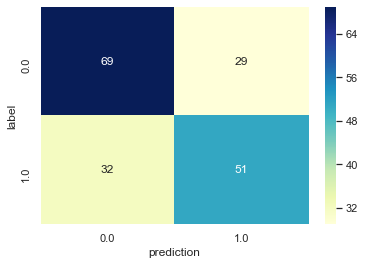

In [21]:
fig = plot_confusion_matrix(train, results)
fig.savefig("figures/{}-{}-train-confusion-matrix.svg".format(result.description, result.input_form), bbox_inches = "tight")

## Train ROC curve

No handles with labels found to put in legend.


FileNotFoundError: [Errno 2] No such file or directory: 'figures/test2-t1-train-ROC-curve.svg'

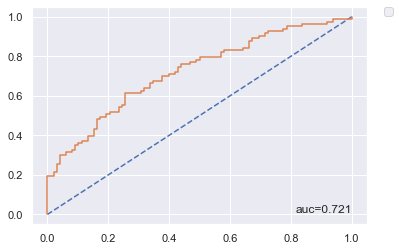

In [22]:
fig = plot_roc_curve(labels, probabilities)
fig.savefig("figures/{}-{}-train-ROC-curve.svg".format(result.description, result.input_form), bbox_inches = "tight")

## Train precision-recall curve

FileNotFoundError: [Errno 2] No such file or directory: 'figures/test2-t1-train-precisionrecall-curve.svg'

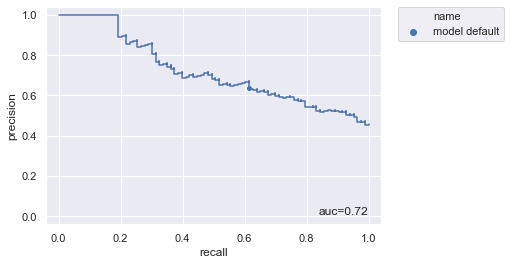

In [23]:
fig = plot_precision_recall(labels, results)
fig.savefig("figures/{}-{}-train-precisionrecall-curve.svg".format(result.description, result.input_form), bbox_inches = "tight")

# Validation

In [24]:
results = get_results(model, validation)

In [25]:
probabilities = transform_binary_probabilities(results)
predictions = transform_binary_predictions(results)
labels = get_labels(validation)
pm.record("validation_labels", list(labels))
pm.record("validation_probabilities", list(probabilities))
pm.record("validation_predictions", list(predictions))

## Validation statistics

In [26]:
loss, accuracy = calculate_accuracy_loss(model, validation)
print("Accuracy:", accuracy)
print("Loss:", loss)
stats = calculate_confusion_matrix_stats(labels, results)
pandas.DataFrame(stats, index=validation.class_indices)

Accuracy: 0.45098039507865906
Loss: 9.564957618713379


,Acc,TP,TN,FP,FN,TPR,TNR,PPV,NPV,FPR,FNR,FDR,AM,GM
0.000,0.451,13,10,14,14,0.481,0.417,0.481,0.417,0.583,0.519,0.519,0.449,0.448
1.000,0.451,10,13,14,14,0.417,0.481,0.417,0.481,0.519,0.583,0.583,0.449,0.448


## Validation confusion matrix

FileNotFoundError: [Errno 2] No such file or directory: 'figures/test2-t1-validation-confusion-matrix.svg'

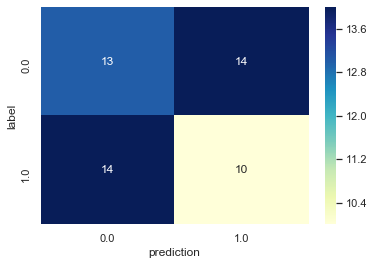

In [27]:
fig = plot_confusion_matrix(validation, results)
fig.savefig("figures/{}-{}-validation-confusion-matrix.svg".format(result.description, result.input_form), bbox_inches = "tight")

## Validation ROC curve

No handles with labels found to put in legend.


FileNotFoundError: [Errno 2] No such file or directory: 'figures/test2-t1-validation-ROC-curve.svg'

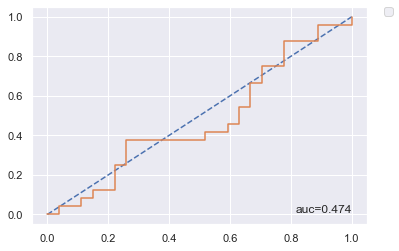

In [28]:
fig = plot_roc_curve(labels, probabilities)
fig.savefig("figures/{}-{}-validation-ROC-curve.svg".format(result.description, result.input_form), bbox_inches = "tight")

## Validation precision-recall curve

In [ ]:
fig = plot_precision_recall(labels, results)
fig.savefig("figures/{}-{}-validation-precisionrecall-curve.svg".format(result.description, result.input_form), bbox_inches = "tight")

# Test

In [29]:
results = get_results(model, test)

In [30]:
probabilities = transform_binary_probabilities(results)
predictions = transform_binary_predictions(results)
labels = get_labels(test)
pm.record("test_labels", list(labels))
pm.record("test_probabilities", list(probabilities))
pm.record("test_predictions", list(predictions))

## Test statistics

In [31]:
loss, accuracy = calculate_accuracy_loss(model, test)
print("Accuracy:", accuracy)
print("Loss:", loss)
stats = calculate_confusion_matrix_stats(labels, results)
pandas.DataFrame(stats, index=validation.class_indices)

Accuracy: 0.6153846383094788
Loss: 9.589296340942383


,Acc,TP,TN,FP,FN,TPR,TNR,PPV,NPV,FPR,FNR,FDR,AM,GM
0.000,0.615,11,5,7,3,0.786,0.417,0.611,0.625,0.583,0.214,0.389,0.601,0.572
1.000,0.615,5,11,3,7,0.417,0.786,0.625,0.611,0.214,0.583,0.375,0.601,0.572


## Test confusion matrix

In [ ]:
fig = plot_confusion_matrix(test, results)
fig.savefig("figures/{}-{}-test-confusion-matrix.svg".format(result.description, result.input_form), bbox_inches = "tight")

## Test ROC curve

No handles with labels found to put in legend.


FileNotFoundError: [Errno 2] No such file or directory: 'figures/test2-t1-test-ROC-curve.svg'

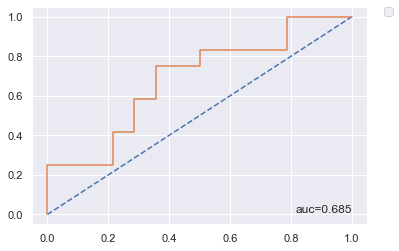

In [32]:
fig = plot_roc_curve(labels, probabilities)
fig.savefig("figures/{}-{}-test-ROC-curve.svg".format(result.description, result.input_form), bbox_inches = "tight")

## Test precision-recall curve

In [ ]:
fig = plot_precision_recall(labels, results)
fig.savefig("figures/{}-{}-test-precisionrecall-curve.svg".format(result.description, result.input_form), bbox_inches = "tight")

In [33]:
import json
hyperparameters = json.loads(result.hyperparameters)
deep_top = hyperparameters["deep-dense-top"]
grad_cam_layer = "dense_3"
if deep_top: 
    grad_cam_layer = "dense_6"

# TSNE

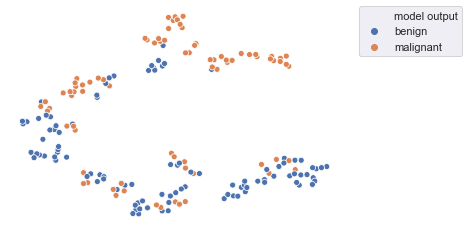

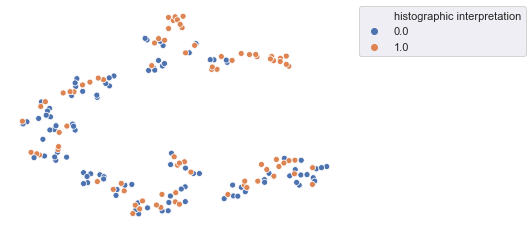

FileNotFoundError: [Errno 2] No such file or directory: 'figures/test2-t1-model-output-tsne.svg'

In [34]:
if result.input_form != "features": 
    layer = "dense_1"
    if deep_top: 
        layer = "dense_3"
    tsne_dataset = train
    tsne_dataset.reset()
    fieldnames = ["histographic interpretation"]
    tsne_results = ["malignant" if i else "benign" for i in transform_binary_predictions(get_results(model, tsne_dataset))]
    figs = plot_tsne(
        model, 
        layer, 
        tsne_dataset, 
        [tsne_results, tsne_dataset.labels], 
        fieldnames=["model output", *fieldnames], 
        perplexity=TSNE_PERPLEXITY,
    )
    for i, field in enumerate(["model output", *fieldnames]): 
        figs[i].savefig("figures/{}-{}-{}-tsne.svg".format(result.description, result.input_form, field.replace(" ", "-")), bbox_inches = "tight")
    tsne_dataset.reset()

# Grad Cam

In [ ]:
def show_grad_cam_images(images, labels, predictions, names=None, penultimate_layer="res5c_branch2c", layer="dense_3", columns=2, include_label=True):
    filter_idx = [0]
    grad_modifier = None
    backprop_modifier = None
    penultimate_layer_idx = None
    if penultimate_layer:
        penultimate_layer_idx = find_layer_idx(model, penultimate_layer)    
    rows = int(math.ceil(len(images) * 2/columns))
    f, ax = plt.subplots(rows, columns, figsize=(5.5, 3 * rows))    
    ax = ax.flatten()
    for i, image in enumerate(images): 
        grad = visualize_cam(
            model,
            find_layer_idx(model, layer),
            filter_idx,
            normalize(image),
            penultimate_layer_idx=penultimate_layer_idx,
            backprop_modifier=backprop_modifier,
            grad_modifier=grad_modifier)
        if names is not None: 
            ax[2*i].set_title("{}".format(names[i]))
        ax[2*i].imshow(image)
        ax[2*i].axis('off')
        if include_label: 
            ax[2*i+1].set_title("label/pred: {}/{}".format(labels[i], predictions[i]))
        ax[2*i+1].imshow(overlay(grad, image))
        ax[2*i+1].axis('off')
    return f, ax

In [ ]:
grad_cam_dataset = validation
grad_cam_dataset.reset()
grad_cam_results = ["malignant" if i else "benign" for i in transform_binary_predictions(get_results(model, grad_cam_dataset))]
if grad_cam_dataset.parameters["t1"]: 
    show_grad_cam_images(grad_cam_dataset.t1, grad_cam_dataset.labels, grad_cam_results, grad_cam_dataset.names, layer=grad_cam_layer)
    plt.show()
if grad_cam_dataset.parameters["t2"]: 
    show_grad_cam_images(grad_cam_dataset.t2, grad_cam_dataset.labels, grad_cam_results, grad_cam_dataset.names, penultimate_layer="res5c_branch2c_t2", layer=grad_cam_layer)
    plt.show()

In [2]:
grad_cam_dataset = validation
grad_cam_dataset.reset()
grad_cam_results = ["malignant" if i else "benign" for i in transform_binary_predictions(get_results(model, grad_cam_dataset))]
inv_indices = {v: k for k, v in grad_cam_dataset.class_indices.items()}

if SELECTIONS == None: 
    SELECTIONS = dict()

if grad_cam_dataset.parameters["t1"]: 
    for k, v in SELECTIONS.items():
        images = grad_cam_dataset.t1
        selected_images = list()
        selected_labels = list()
        selected_results = list()
        for i, name in enumerate(grad_cam_dataset.names): 
            if name in v: 
                selected_images.append(images[i])
                selected_labels.append(grad_cam_dataset.labels[i])
                selected_results.append(grad_cam_results[i])            
        fig, ax = show_grad_cam_images(selected_images, selected_labels, selected_results, include_label=False, names=None, layer=grad_cam_layer)
        title = fig.suptitle("Label: {} | Prediction: {}".format(k[0], k[1]))
        fig.savefig("figures/{}-{}-grad-cam-{}-{}.svg".format(result.description, result.input_form, k[0], k[1]), bbox_inches = "tight", bbox_extra_artists=[title])                
        fig.show()

if grad_cam_dataset.parameters["t2"]: 
    for k, v in SELECTIONS.items():
        images = grad_cam_dataset.t2
        selected_images = list()
        selected_labels = list()
        selected_results = list()
        for i, name in enumerate(grad_cam_dataset.names): 
            if name in v: 
                selected_images.append(images[i])
                selected_labels.append(grad_cam_dataset.labels[i])
                selected_results.append(grad_cam_results[i])
        fig, ax = show_grad_cam_images(selected_images, selected_labels, selected_results, names=None, penultimate_layer="res5c_branch2c_t2",include_label=False, layer=grad_cam_layer)
        title = fig.suptitle("Label: {} | Prediction: {}".format(k[0], k[1]))
        fig.savefig("figures/{}-{}-grad-cam-{}-{}.svg".format(result.description, result.input_form, k[0], k[1]), bbox_inches = "tight", bbox_extra_artists=[title])        
        fig.show()

NameError: name 'test' is not defined

In [ ]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')